In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview
import napari
from skimage.measure import regionprops_table
import pandas as pd
import numpy as np
import napari_pyclesperanto_assistant._advanced_statistics as nas
from napari_clusters_plotter._dimensionality_reduction import umap
from napari_clusters_plotter._clustering import kmeans_clustering
import seaborn as sns
import matplotlib.pyplot as plt


StackViewNDArray([[[ 1,  2,  2, ...,  2,  1,  1],
                   [ 0,  1,  2, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  1,  2,  3],
                   ...,
                   [ 7,  7,  7, ...,  9,  9,  9],
                   [ 7,  8,  8, ..., 10,  9, 10],
                   [ 7,  7,  7, ...,  9, 10,  9]],

                  [[ 1,  1,  1, ...,  2,  2,  1],
                   [ 0,  1,  2, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   ...,
                   [ 7,  7,  7, ...,  9,  9, 10],
                   [ 6,  7,  8, ..., 10, 10, 10],
                   [ 7,  7,  7, ..., 10, 10,  9]],

                  [[ 1,  2,  1, ...,  2,  2,  1],
                   [ 0,  1,  2, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   ...,
                   [ 7,  7,  7, ...,  9, 10, 10],
                   [ 6,  7,  8, ..., 10, 10, 10],
                   [ 7,  7,  7, ..., 10, 10,  9]],

                  ...,

                  [[ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   ...,
                   [ 2,  2,  2, ...,  3,  2,  3],
                   [ 2,  2,  3, ...,  4,  3,  3],
                   [ 2,  2,  2, ...,  2,  2,  3]],

                  [[ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   ...,
                   [ 2,  3,  3, ...,  3,  2,  3],
                   [ 2,  2,  3, ...,  4,  3,  3],
                   [ 1,  2,  3, ...,  3,  2,  3]],

                  [[ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   [ 0,  0,  0, ...,  0,  0,  0],
                   ...,
                   [ 2,  3,  2, ...,  3,  3,  3],
                   [ 2,  2,  2, ...,  3,  3,  3],
                   [ 2,  2,  2, ...,  3,  2,  3]]], dtype=uint8)
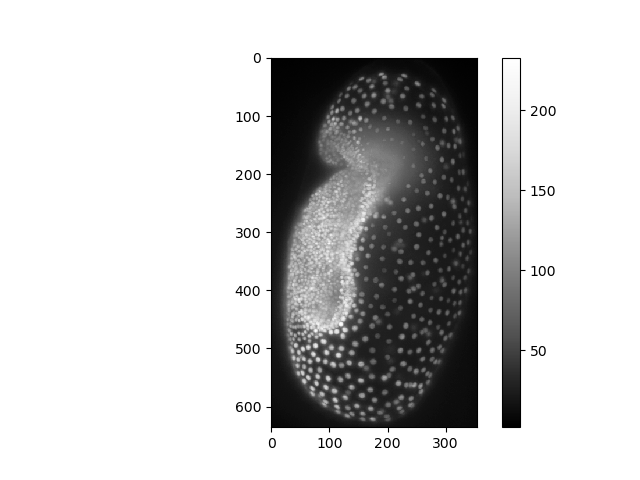
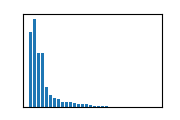

In [2]:
nuclei = imread("c:/structure/data/Lund-100MB.tif")[2]

stackview.insight(nuclei)

In [3]:
viewer = napari.Viewer(ndisplay=3)

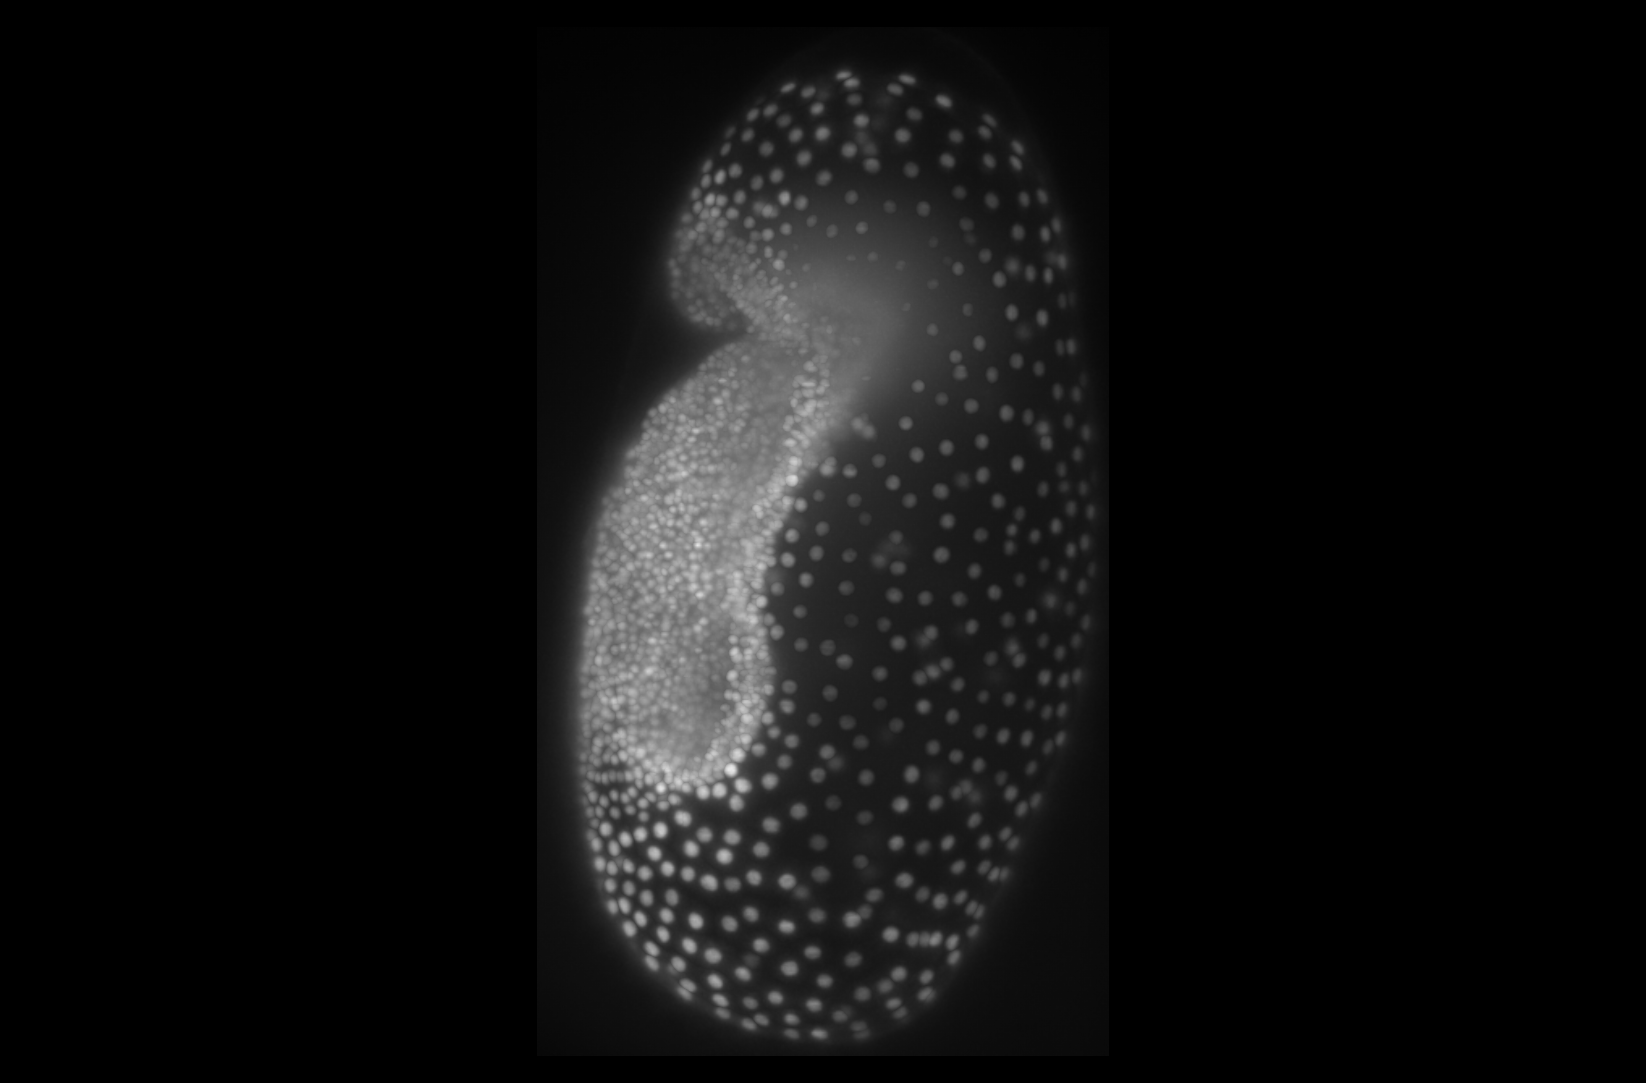

In [4]:
viewer.add_image(nuclei)
napari.utils.nbscreenshot(viewer, canvas_only=True)

In [5]:
viewer.camera.angles

(0.0, 0.0, 90.00000000000001)

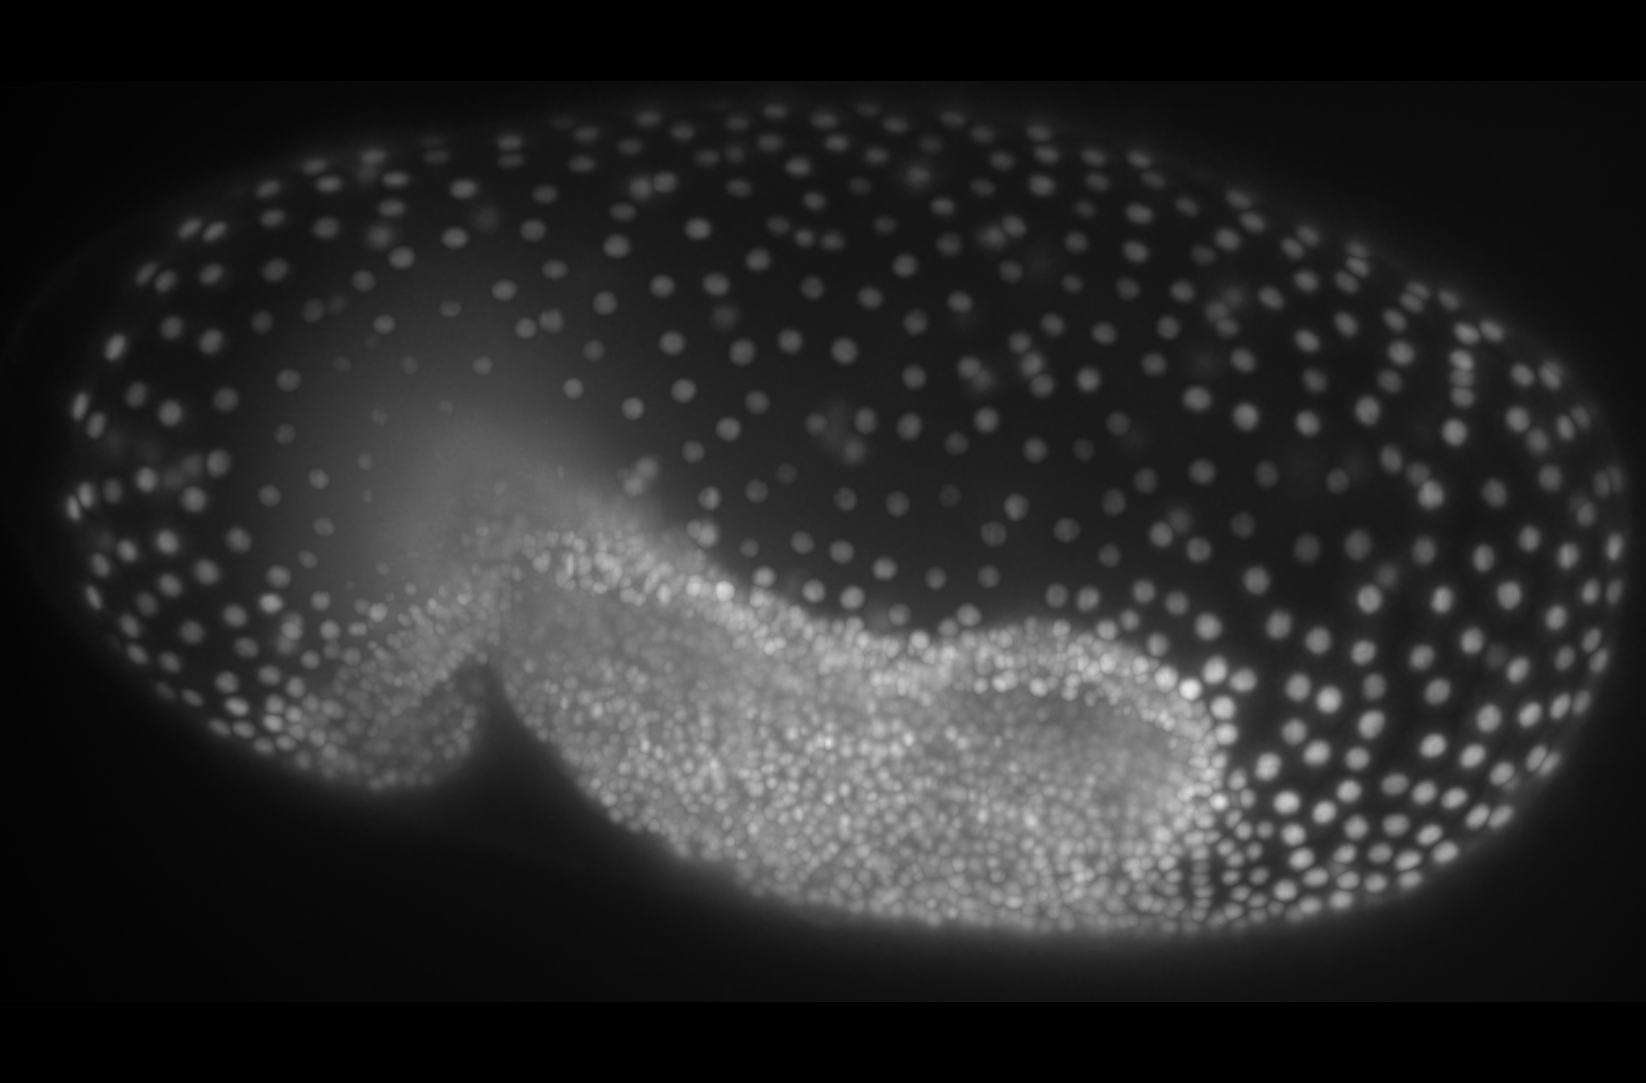

In [6]:
viewer.camera.angles = (90, 0, 90)
viewer.camera.zoom = 2.6
napari.utils.nbscreenshot(viewer, canvas_only=True)

In [7]:
bg_subtracted = cle.top_hat_box(nuclei, radius_x=10, radius_y=10, radius_z=10)

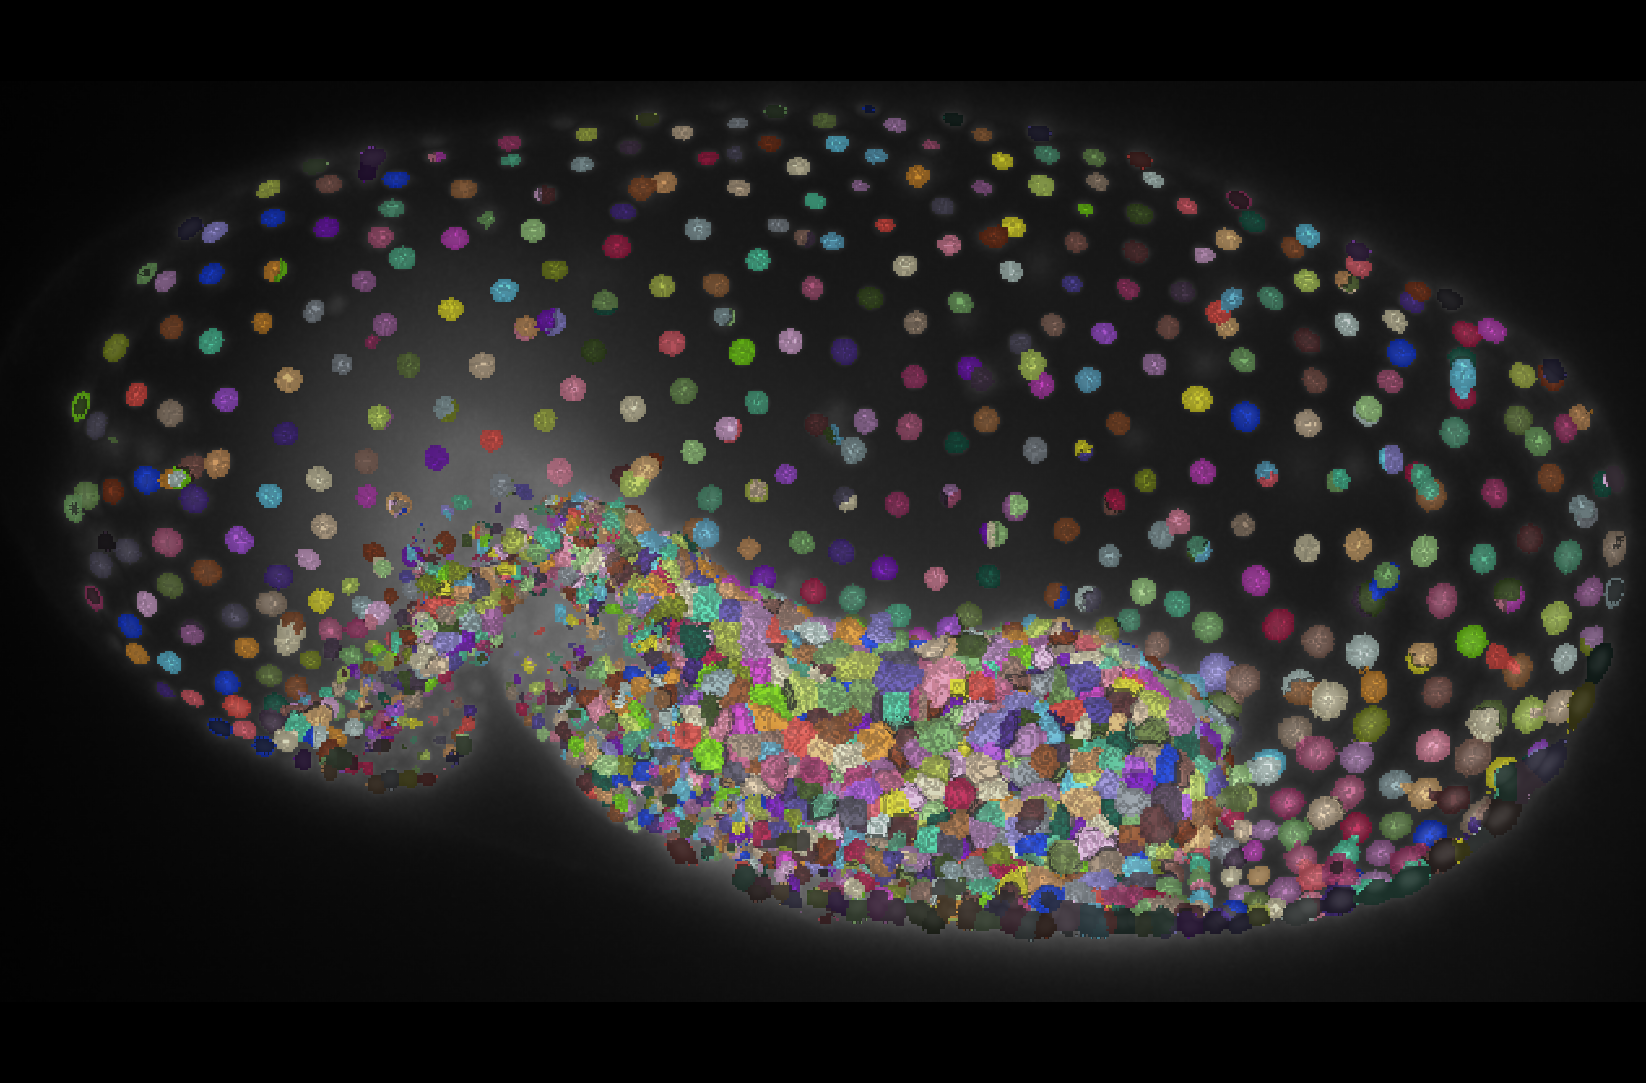

In [8]:
labels = cle.voronoi_otsu_labeling(bg_subtracted, spot_sigma=0.5, outline_sigma=0)

viewer.add_labels(labels)
napari.utils.nbscreenshot(viewer, canvas_only=True)

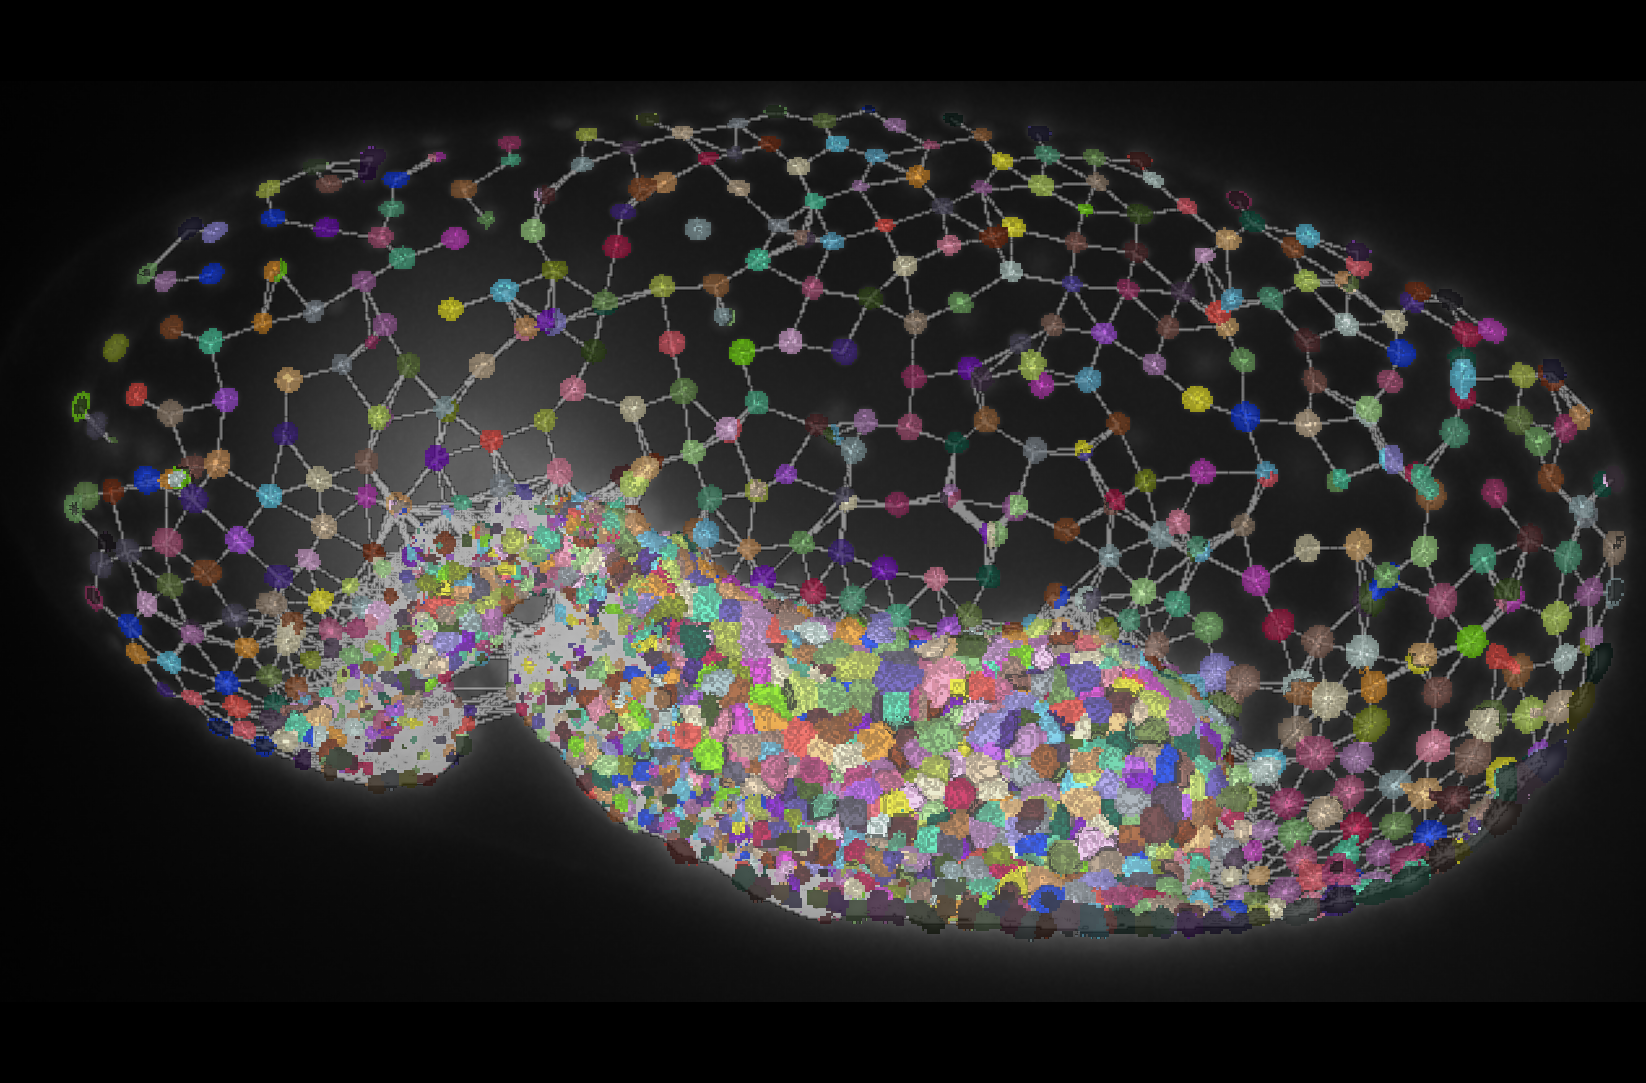

In [9]:
neighbor_connections = cle.draw_mesh_between_proximal_labels(labels, maximum_distance=25)

viewer.add_image(neighbor_connections, opacity=0.5)
napari.utils.nbscreenshot(viewer, canvas_only=True)

In [10]:
neighbor_stats = cle.statistics_of_labelled_neighbors(labels, proximal_distances=[25], nearest_neighbor_ns=[], dilation_radii=[])
neighbor_stats

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\pyclesperanto_prototype\_tier0\_opencl_execute.py:281: RuntimeWarning: overflow encountered in cast
  arguments.append(np.array([value], np.float32))


{'label': array([   1,    2,    3, ..., 2184, 2185, 2186]),
 'touching_neighbor_count': array([5., 3., 5., ..., 0., 0., 0.], dtype=float32),
 'minimum_distance_of_touching_neighbors': array([6.2099104, 4.783322 , 5.3679237, ..., 0.       , 0.       ,
        0.       ], dtype=float32),
 'average_distance_of_touching_neighbors': array([9.229854 , 5.9108377, 8.382152 , ..., 0.       , 0.       ,
        0.       ], dtype=float32),
 'maximum_distance_of_touching_neighbors': array([12.065423 ,  6.8475013, 10.020198 , ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 'max_min_distance_ratio_of_touching_neighbors': array([1.9429303, 1.4315368, 1.8666804, ...,       nan,       nan,
              nan], dtype=float32),
 'proximal_neighbor_count_d25': array([25., 18., 16., ...,  1.,  2.,  2.], dtype=float32),
 'distance_to_most_distant_other': array([427.15463, 445.42847, 466.85413, ..., 378.41937, 389.53204,
        366.03748], dtype=float32),
 'touch_portion_above_0_neighbor_c

In [11]:
intensity_stats = cle.statistics_of_labelled_pixels(nuclei, labels)
intensity_stats

{'label': array([   1,    2,    3, ..., 2184, 2185, 2186]),
 'original_label': array([   1,    2,    3, ..., 2184, 2185, 2186]),
 'bbox_min_x': array([ 24.,  24.,  24., ..., 337., 340., 342.], dtype=float32),
 'bbox_min_y': array([399., 421., 447., ..., 364., 295., 333.], dtype=float32),
 'bbox_min_z': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'bbox_max_x': array([ 33.,  32.,  33., ..., 341., 344., 344.], dtype=float32),
 'bbox_max_y': array([407., 427., 455., ..., 371., 303., 337.], dtype=float32),
 'bbox_max_z': array([ 5.,  3., 10., ...,  4.,  6.,  1.], dtype=float32),
 'bbox_width': array([10.,  9., 10., ...,  5.,  5.,  3.], dtype=float32),
 'bbox_height': array([9., 7., 9., ..., 8., 9., 5.], dtype=float32),
 'bbox_depth': array([ 6.,  4., 11., ...,  5.,  7.,  2.], dtype=float32),
 'min_intensity': array([72., 76., 71., ..., 42., 41., 41.], dtype=float32),
 'max_intensity': array([118., 123., 118., ...,  56.,  63.,  46.], dtype=float32),
 'sum_intensity': array([23517.,

In [12]:
table = nas.advanced_statistics(nuclei, labels)
table

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\napari_pyclesperanto_assistant\_advanced_statistics.py:18: UserWarning: 'Statistics of labeled pixels including neighborhood statistics' is deprecated. Use 'Label statistics' instead.
  warnings.warn("'Statistics of labeled pixels including neighborhood statistics' is deprecated. Use 'Label statistics' instead.")


Measurements Completed.


label  original_label  bbox_min_x  bbox_min_y  bbox_min_z  bbox_max_x  \
0         1               1        24.0       399.0         0.0        33.0   
1         2               2        24.0       421.0         0.0        32.0   
2         3               3        24.0       447.0         0.0        33.0   
3         4               4        24.0       454.0         0.0        34.0   
4         5               5        26.0       474.0         0.0        33.0   
...     ...             ...         ...         ...         ...         ...   
2181   2182            2182       336.0       314.0         9.0       341.0   
2182   2183            2183       337.0       246.0         0.0       341.0   
2183   2184            2184       337.0       364.0         0.0       341.0   
2184   2185            2185       340.0       295.0         0.0       344.0   
2185   2186            2186       342.0       333.0         0.0       344.0   

      bbox_max_y  bbox_max_z  bbox_width  bbox_height  ...  \
0          407.0         5.0        10.0          9.0  ...   
1          427.0         3.0         9.0          7.0  ...   
2          455.0        10.0        10.0          9.0  ...   
3          463.0         4.0        11.0         10.0  ...   
4          482.0         6.0         8.0          9.0  ...   
...          ...         ...         ...          ...  ...   
2181       322.0        18.0         6.0          9.0  ...   
2182       254.0         6.0         5.0          9.0  ...   
2183       371.0         4.0         5.0          8.0  ...   
2184       303.0         6.0         5.0          9.0  ...   
2185       337.0         1.0         3.0          5.0  ...   

      mean_distance_to_mass_center  standard_deviation_intensity  \
0                         3.171949                     10.205904   
1                         2.523527                     14.266017   
2                         3.634385                     11.750536   
3                         3.281820                      9.279823   
4                         3.012358                      9.451112   
...                            ...                           ...   
2181                      3.302892                      5.972755   
2182                      2.875455                      5.113707   
2183                      2.451998                      4.137193   
2184                      2.839247                      5.784661   
2185                      1.363840                      1.797730   

      max_distance_to_centroid  max_distance_to_mass_center  \
0                     6.630781                     6.738830   
1                     4.996852                     5.212889   
2                     7.272151                     7.273856   
3                     5.899060                     5.854911   
4                     5.345889                     5.261563   
...                        ...                          ...   
2181                  5.170120                     5.152297   
2182                  4.701997                     4.726860   
2183                  4.092820                     4.091985   
2184                  4.557525                     4.541391   
2185                  2.319629                     2.319256   

      mean_max_distance_to_centroid_ratio  \
0                                2.090412   
1                                1.990156   
2                                2.000982   
3                                1.798308   
4                                1.776183   
...                                   ...   
2181                             1.565350   
2182                             1.635346   
2183                             1.669467   
2184                             1.605322   
2185                             1.700925   

      mean_max_distance_to_mass_center_ratio  \
0                                   2.124507   
1                                   2.065715   
2                                   2.001400   
3    

In [13]:
table.columns

Index(['label', 'original_label', 'bbox_min_x', 'bbox_min_y', 'bbox_min_z',
       'bbox_max_x', 'bbox_max_y', 'bbox_max_z', 'bbox_width', 'bbox_height',
       'bbox_depth', 'min_intensity', 'max_intensity', 'sum_intensity', 'area',
       'mean_intensity', 'sum_intensity_times_x', 'mass_center_x',
       'sum_intensity_times_y', 'mass_center_y', 'sum_intensity_times_z',
       'mass_center_z', 'sum_x', 'centroid_x', 'sum_y', 'centroid_y', 'sum_z',
       'centroid_z', 'sum_distance_to_centroid', 'mean_distance_to_centroid',
       'sum_distance_to_mass_center', 'mean_distance_to_mass_center',
       'standard_deviation_intensity', 'max_distance_to_centroid',
       'max_distance_to_mass_center', 'mean_max_distance_to_centroid_ratio',
       'mean_max_distance_to_mass_center_ratio',
       'avg_distance_of_2_nearest_neigbors',
       'avg_distance_of_3_nearest_neigbors',
       'avg_distance_of_4_nearest_neigbors', 'touching_neighbor_count'],
      dtype='object')

In [14]:
table_dim_red = pd.DataFrame({k: table[k] for k in [

#'min_intensity', 
#'max_intensity', 
#'area',
'mean_intensity', 
#'mass_center_x',
#'mass_center_y', 
#'mass_center_z', 
#'centroid_x', 
#'centroid_y', 
#'centroid_z', 
#'mean_distance_to_centroid',
#'mean_distance_to_mass_center',
'standard_deviation_intensity', 
#'max_distance_to_centroid',
#'max_distance_to_mass_center', 
#'mean_max_distance_to_centroid_ratio',
#'mean_max_distance_to_mass_center_ratio',
#'avg_distance_of_2_nearest_neigbors',
#'avg_distance_of_3_nearest_neigbors',
'avg_distance_of_4_nearest_neigbors', 
'touching_neighbor_count'

]})

umap_table = umap(table_dim_red, n_neighbors=15, n_components=2, min_dist=0.1)
umap_table

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\umap\distances.py:1086: NumbaDepr

('UMAP',
 array([[ 7.2152653 ,  0.25958052],
        [ 7.1479826 ,  0.49318957],
        [ 4.948551  ,  0.11478776],
        ...,
        [-4.4583693 ,  6.3534966 ],
        [-4.556163  ,  6.0747447 ],
        [-4.2785654 ,  6.71291   ]], dtype=float32))

In [15]:
umap_table[1][:,1].shape

(2186,)

In [16]:
table_to_cluster = pd.DataFrame({
    "UMAP0":umap_table[1][:,0],
    "UMAP1":umap_table[1][:,0],    
})

clustering = kmeans_clustering(table_to_cluster, cluster_number=3, iterations=10)
clustering

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


('KMEANS', array([2, 2, 2, ..., 0, 0, 0]))

In [17]:
table['kmeans_clustering'] = clustering[1]
table['UMAP0'] = umap_table[1][:,0]
table['UMAP1'] = umap_table[1][:,1]

In [18]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [19]:
from napari_clusters_plotter._utilities import get_nice_colormap

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='UMAP0', ylabel='UMAP1'>

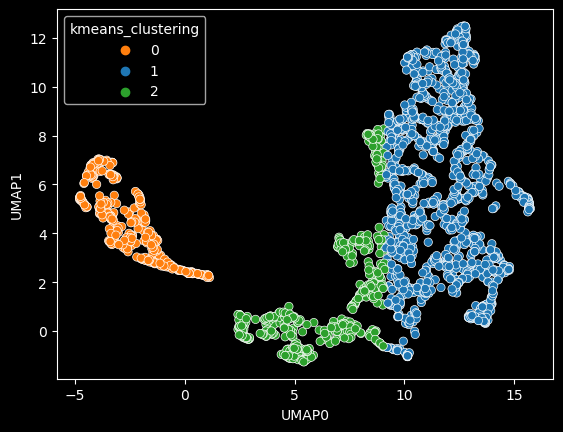

In [20]:
# Create a scatter plot of UMAP0 vs UMAP1 colored by kmeans_clustering
sns.scatterplot(data=table, x='UMAP0', y='UMAP1', hue='kmeans_clustering', palette=get_nice_colormap())

In [21]:
table.columns

Index(['label', 'original_label', 'bbox_min_x', 'bbox_min_y', 'bbox_min_z',
       'bbox_max_x', 'bbox_max_y', 'bbox_max_z', 'bbox_width', 'bbox_height',
       'bbox_depth', 'min_intensity', 'max_intensity', 'sum_intensity', 'area',
       'mean_intensity', 'sum_intensity_times_x', 'mass_center_x',
       'sum_intensity_times_y', 'mass_center_y', 'sum_intensity_times_z',
       'mass_center_z', 'sum_x', 'centroid_x', 'sum_y', 'centroid_y', 'sum_z',
       'centroid_z', 'sum_distance_to_centroid', 'mean_distance_to_centroid',
       'sum_distance_to_mass_center', 'mean_distance_to_mass_center',
       'standard_deviation_intensity', 'max_distance_to_centroid',
       'max_distance_to_mass_center', 'mean_max_distance_to_centroid_ratio',
       'mean_max_distance_to_mass_center_ratio',
       'avg_distance_of_2_nearest_neigbors',
       'avg_distance_of_3_nearest_neigbors',
       'avg_distance_of_4_nearest_neigbors', 'touching_neighbor_count',
       'kmeans_clustering', 'UMAP0', 'UMAP1

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='centroid_y', ylabel='centroid_x'>

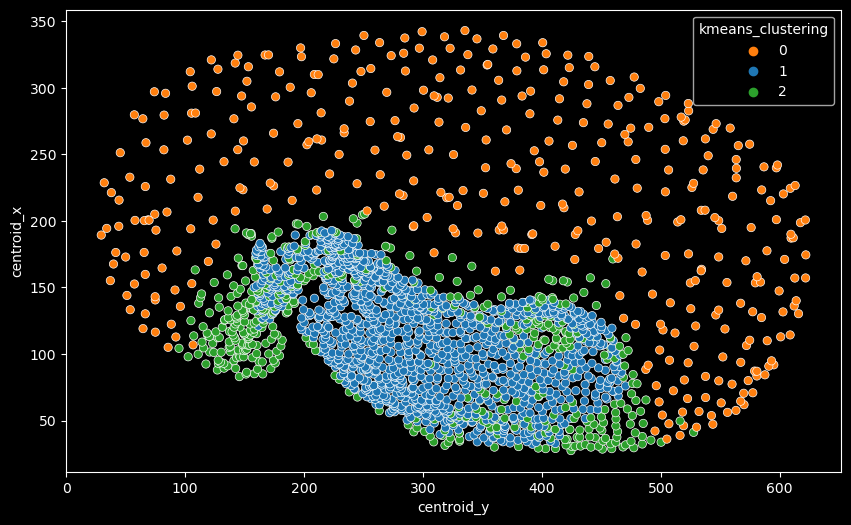

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=table, x='centroid_y', y='centroid_x', hue='kmeans_clustering', palette=get_nice_colormap())

In [23]:
trainers = [
    "Stéphane Rigaud, Image Analysis Hub, Institut Pasteur, Paris",
    "Laura Žigutytė, Clinical AI / Kather lab, EKFZ, TU Dresden",
    "Anja Neumann, ScaDS.AI, Uni Leipzig",
    "Marie-Sophie von Braun, ScaDS.AI, Uni Leipzig",
    "Matthias Täschner, ScaDS.AI, Uni Leipzig",
    "Christian Martin, ScaDS.AI, Uni Leipzig",
    "Jan Ewald, ScaDS.AI, Uni Leipzig",
    "Robert Haase, ScaDS.AI, Uni Leipzig",
]

In [24]:
sorted(trainers)

['Anja Neumann, ScaDS.AI, Uni Leipzig',
 'Christian Martin, ScaDS.AI, Uni Leipzig',
 'Jan Ewald, ScaDS.AI, Uni Leipzig',
 'Laura Žigutytė, Clinical AI / Kather lab, EKFZ, TU Dresden',
 'Marie-Sophie von Braun, ScaDS.AI, Uni Leipzig',
 'Matthias Täschner, ScaDS.AI, Uni Leipzig',
 'Robert Haase, ScaDS.AI, Uni Leipzig',
 'Stéphane Rigaud, Image Analysis Hub, Institut Pasteur, Paris']